#                                             Predicting Online News Popularity


### Author: NAJMA A
### Date: 

###  Table of Contents
Include a structured list of sections, as provided in your roadmap.

##  Overview of Problem Statement
Define the problem:The goal is to predict the popularity of online news articles based on their features. Popularity is quantified by the number of shares, making this a regression task.


##  Objective
Develop a regression model that accurately predicts article shares based on features such as content metrics, engagement metrics, and publication details.


## Data Collection
Load the data into a pandas DataFrame:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import rankdata, norm
from scipy import stats


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [4]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## Data Description
- Source: UCI Machine Learning Repository  
- Shape: `(39644, 61)`  
- Features: Content-related metrics, engagement statistics, and publishing details.
- Target: `shares`

## Exploratory Data Analysis (EDA)
Perform detailed EDA to understand the data:

In [5]:
# Summary statistics
print(df.describe())

          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000  

In [6]:
# Check for null values
print(df.isnull().sum())

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [7]:
# remove all spaces from columns
cols = [col.strip() for col in df.columns.to_list()]

# replace dataframe colum
df.columns = cols

In [8]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [9]:
df['shares'].unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [11]:
df.shape

(39644, 61)

In [12]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [13]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [14]:
df['shares'].value_counts()

shares
1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name: count, Length: 1454, dtype: int64

### 
This function provides a count of occurrences for each unique value in the ' shares' column. It sorts these values in descending order, showing the most frequently occurring values first.
The value 1100 (shares) appears 2308 times in the dataset, making it the most common number of shares.1200 shares occur 2018 times in the dataset, and so on.
The Length: 1454 at the end shows that there are 1454 unique values in the ' shares' column.
This output is helpful for identifying the distribution of the target variable, which may suggest skewness or the presence of frequent and rare values.For regression tasks, it helps understand the range and frequency of the target values.

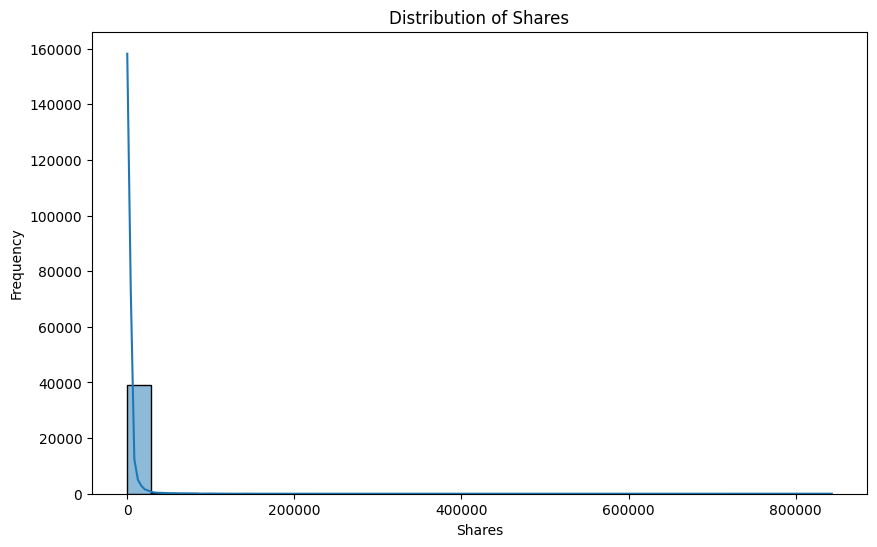

In [15]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

###
The histogram plot of the shares variable shows a highly skewed distribution. Here are the key observations:
Right Skewed (Positive Skew): The distribution is heavily skewed to the right. Most articles have a low number of shares, while only a few have very high shares, creating a long tail on the right side of the plot.

High Frequency of Low Shares: The majority of articles fall into the low share count range (close to 0), indicating that most articles do not receive high popularity.

Presence of Outliers: There are a few articles with an extremely high number of shares, represented by the long tail extending toward 800,000. These are likely outliers and may need special handling, such as using a log transformation, to normalize the distribution for regression modeling.

Log Transformation Recommendation: Given the skewness, applying a log transformation to shares can help reduce skewness and make the distribution more normal-like, which is often beneficial for modeling.¶

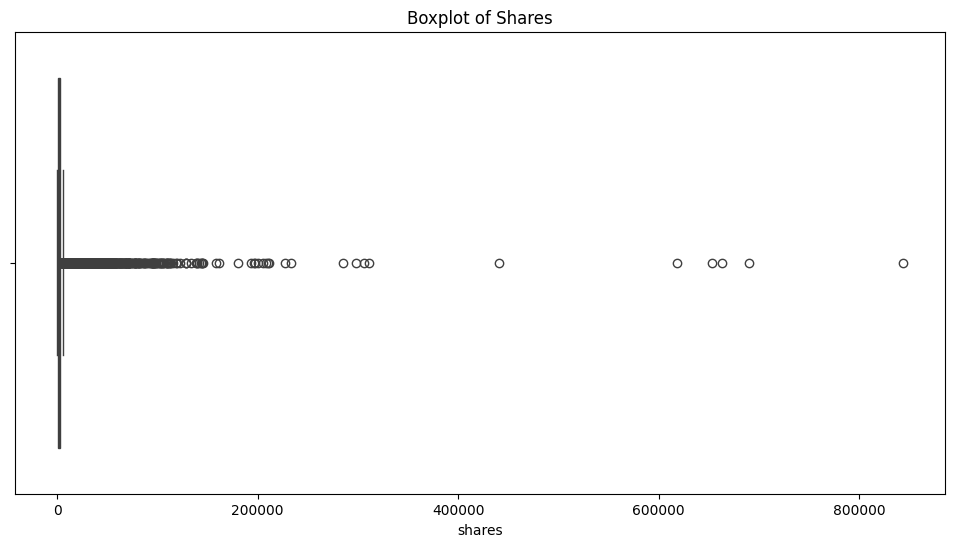

In [16]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='shares', data=df)
plt.title('Boxplot of Shares')
plt.show()

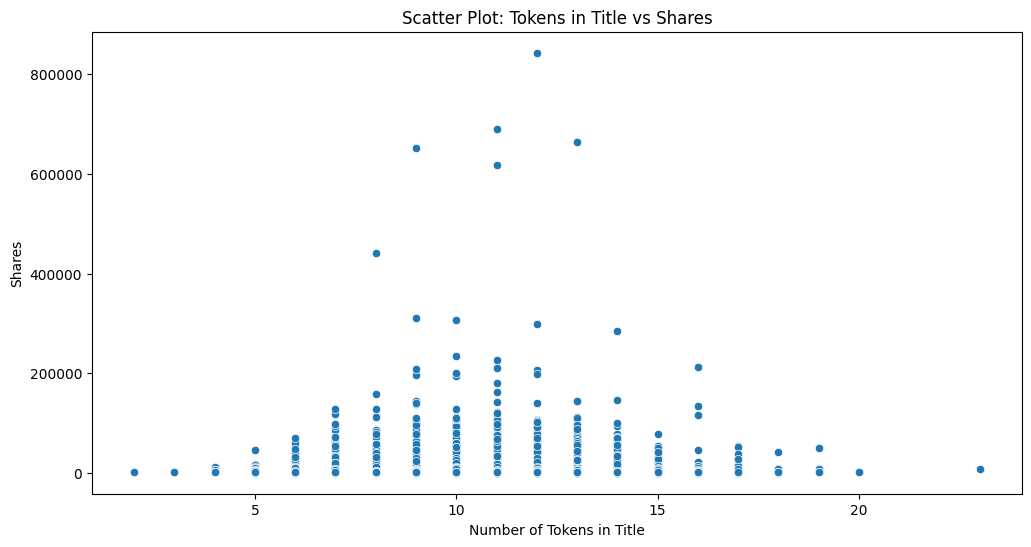

In [17]:
# Scatter plot (assuming we have a numerical column to compare)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_tokens_title', y='shares', data=df)
plt.title('Scatter Plot: Tokens in Title vs Shares')
plt.xlabel('Number of Tokens in Title')
plt.ylabel('Shares')
plt.show()

###
This scatter plot visualizes the relationship between the number of tokens (words) in the title of an article and the number of shares it receives. Distribution of Shares: The number of shares varies widely across different token counts in titles. The highest concentration of shares seems to fall below the 200,000 mark, though a few outliers reach as high as over 800,000 shares.

Optimal Range of Tokens: The scatter plot shows that most articles tend to have between 5 and 15 tokens in their titles. Additionally, there appears to be a slight concentration of higher share counts for titles with around 9-12 tokens.

Outliers: There are notable outliers with exceptionally high shares across different title lengths, indicating that some articles perform very well regardless of title length.

In summary, while the number of tokens in the title doesn’t directly correlate with a clear increase or decrease in shares, there may be an optimal range (roughly 9-12 tokens) where higher engagement (in terms of shares) is more common. This could suggest that titles that are neither too short nor too long might engage readers more effectively.

In [18]:
''' finding and extracting categorical features '''
# I USED 20 as threshold
count = 0
threshold = 20 # try change and see difference
categorical_features = []
numerical_features = []
for col in df:
    unique_col_values = len(df[col].unique())
    if unique_col_values < threshold:
        count+=1
        categorical_features.append(col)
    else:
        numerical_features.append(col)
print(f'dataset has {count} values can be considered as categorical values.')

dataset has 15 values can be considered as categorical values.


### Plot histogram distribution of each categorical features¶

NameError: name 'axes' is not defined

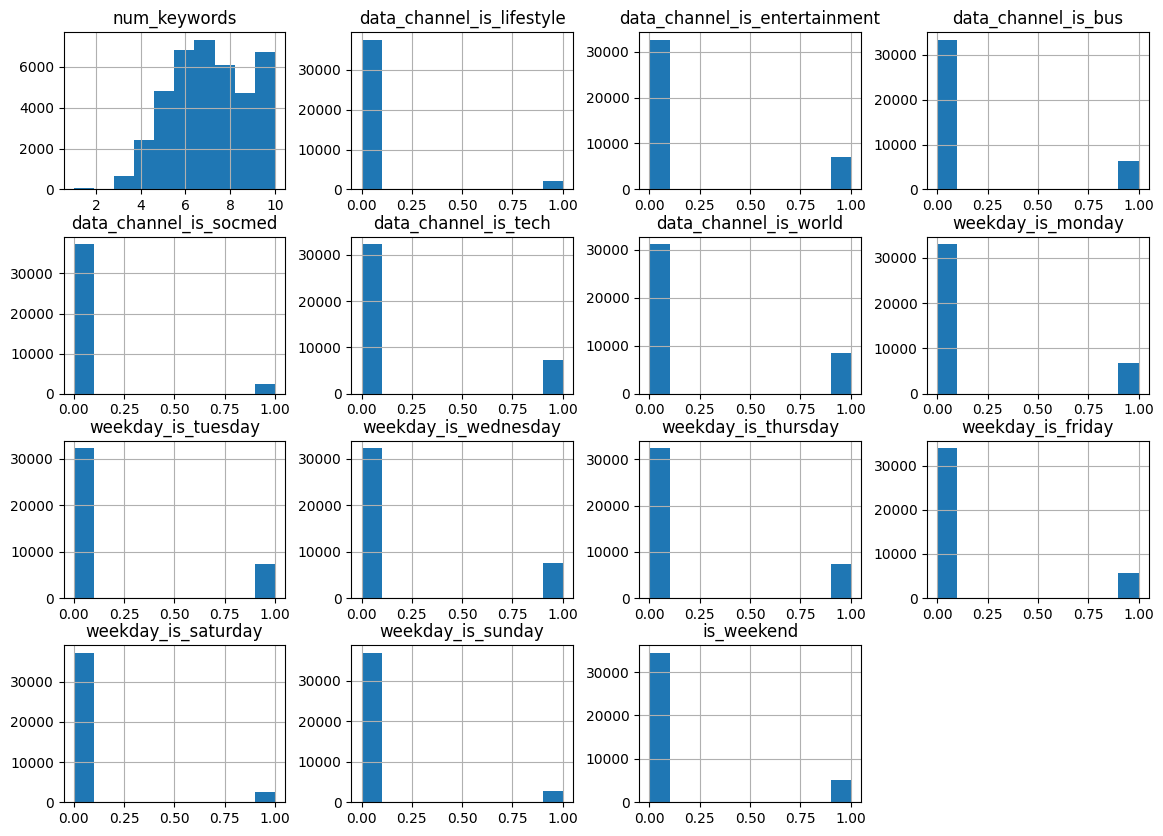

In [19]:
df[categorical_features].hist(bins=10, figsize=(14, 10))
# Hide axis titles
axes = axes.flatten()
for ax in axes.flatten():
    ax.set_title('')

plt.show()

## Observation from analysis of categorical variable ''
There are multi categorical and 14 binary categorical variables

- Observation in the distribution of binary categorical variable shows high bias to one value (cross validation will help overcoming this issue)
- But the distribution is also somewhat similar in all, may need to handle it later
- Multi-categorical variable looks fine!

NameError: name 'axes' is not defined

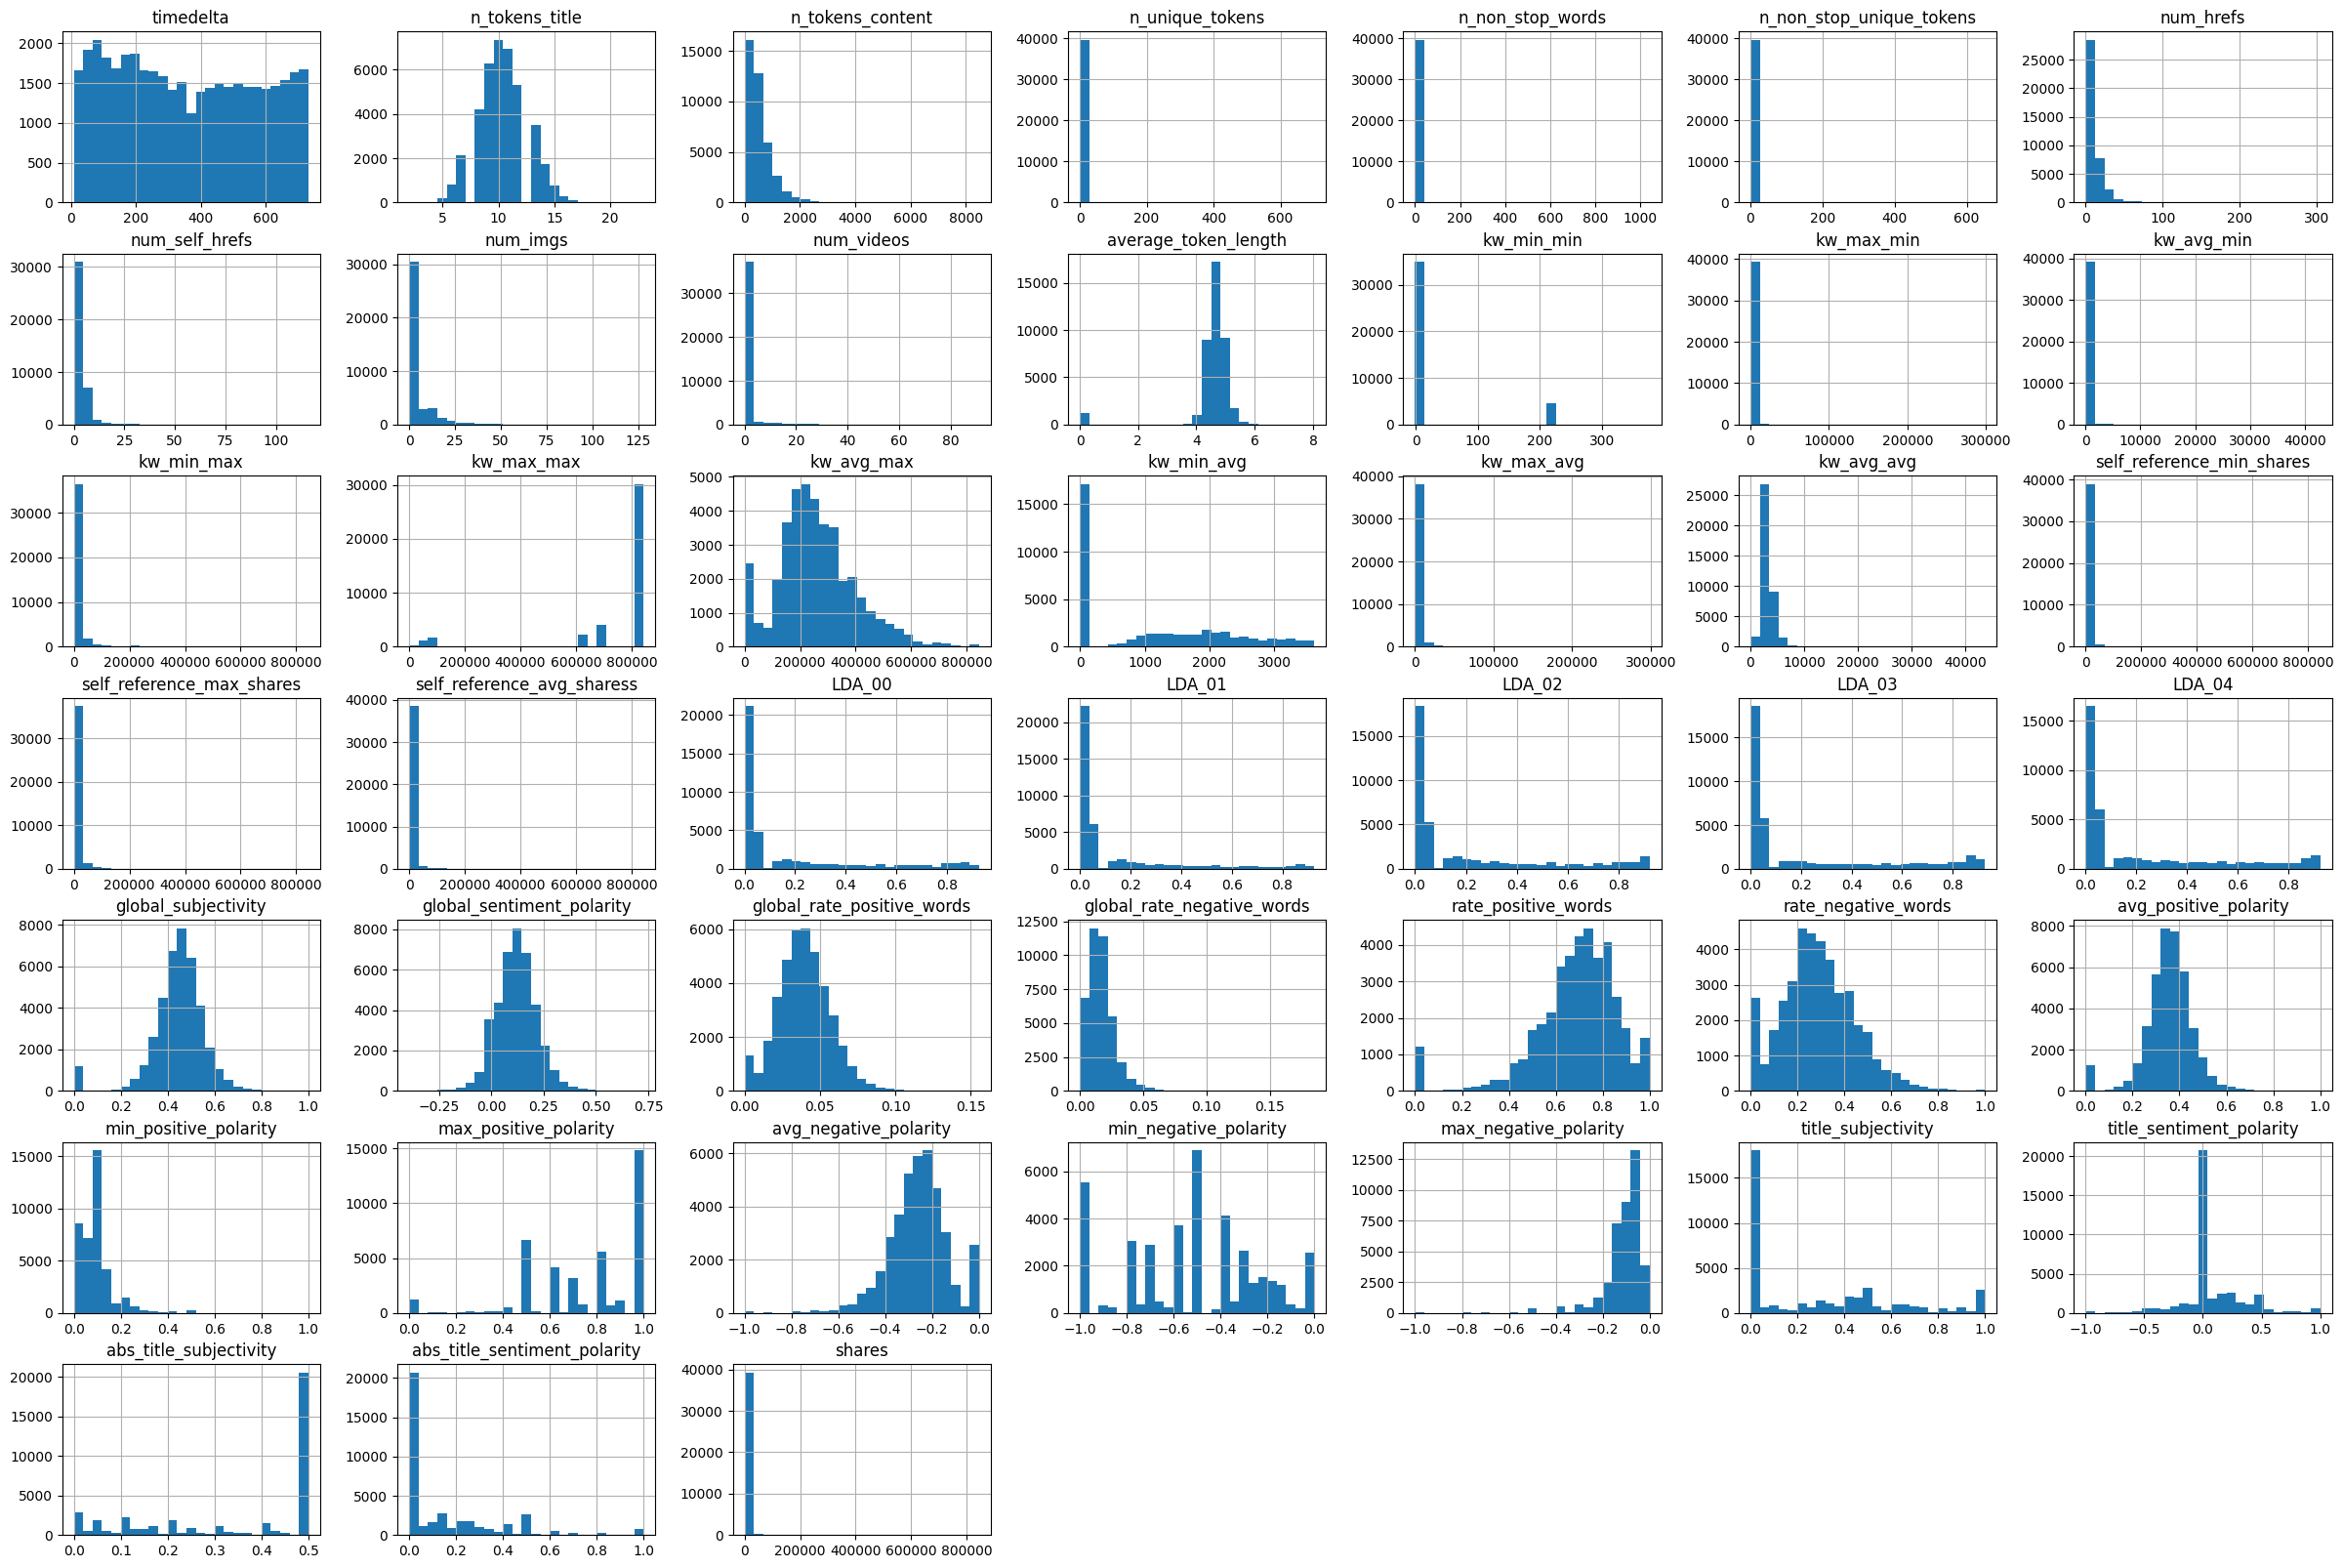

In [20]:
df[numerical_features].hist(bins=25, figsize=(30, 20))
# Hide axis titles
axes = axes.flatten()
for ax in axes.flatten():
    ax.set_title('')

plt.show()

-  some of the features looks okay
- found distributions that looks similar
- highly skewd distributions are there(range, outlier)

In [21]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Since weekday indicators and data channel columns are binary (1/0), identify them as categorical
# Example: Assume weekday columns start with 'weekday_' and data channels with 'data_channel_'
categorical_cols = [col for col in df.columns if col.startswith('weekday_') or col.startswith('data_channel_')]
categorical_cols.append('is_weekend')

# Remove the binary columns from the numerical columns list
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("\nNumerical columns:", numerical_cols)
print("\nCategorical (binary) columns:", categorical_cols)


Numerical columns: ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

Categorical (binary) columns: ['data_channel_is_lifestyle', 'data_channel

/var/folders/mm/_1tx3g0x1fxfsx7bt24kcyv80000gp/T/ipykernel_1509/897784857.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_shares_df, x='Channel', y='Total Shares', palette="viridis")


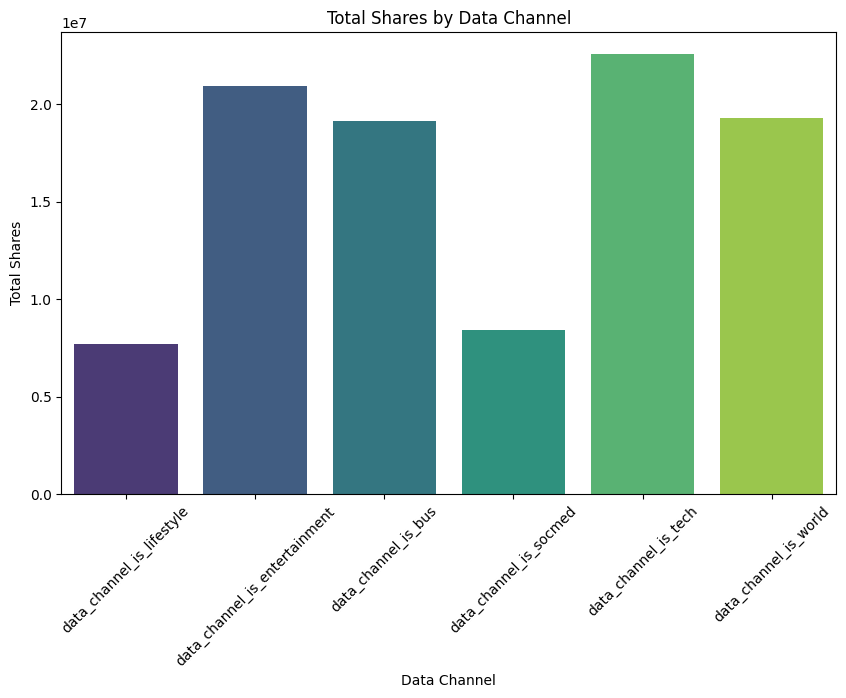

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of data channel columns
channel_columns = [
    'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
    'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'
]

# Calculate the total shares for each channel by summing 'shares' where each channel is active (1)
channel_shares = {channel: df[df[channel] == 1]['shares'].sum() for channel in channel_columns}

# Convert the dictionary to a DataFrame for easier plotting
channel_shares_df = pd.DataFrame(list(channel_shares.items()), columns=['Channel', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_shares_df, x='Channel', y='Total Shares', palette="viridis")
plt.title("Total Shares by Data Channel")
plt.xlabel("Data Channel")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()


/var/folders/mm/_1tx3g0x1fxfsx7bt24kcyv80000gp/T/ipykernel_1509/2144543656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_shares_df, x='Day', y='Total Shares', palette="viridis")


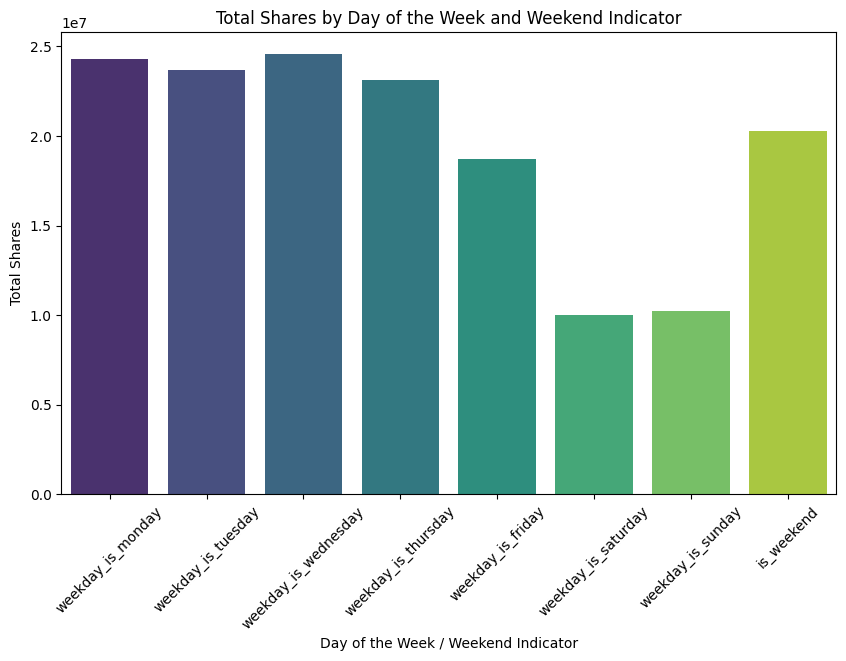

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of weekday columns and weekend indicator
weekday_columns = [
    'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
    'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'
]

# Calculate the total shares for each weekday and weekend by summing 'shares' where each column is active (1)
weekday_shares = {day: df[df[day] == 1]['shares'].sum() for day in weekday_columns}

# Convert the dictionary to a DataFrame for easier plotting
weekday_shares_df = pd.DataFrame(list(weekday_shares.items()), columns=['Day', 'Total Shares'])

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_shares_df, x='Day', y='Total Shares', palette="viridis")
plt.title("Total Shares by Day of the Week and Weekend Indicator")
plt.xlabel("Day of the Week / Weekend Indicator")
plt.ylabel("Total Shares")
plt.xticks(rotation=45)
plt.show()

## SKENESS

In [24]:
# checks for the skewness and kurtosis

from scipy.stats import skew, kurtosis

skewness = skew(df['shares'])
kurt = kurtosis(df['shares'])

print(f"Skewness of Shares: {skewness}")
print(f"Kurtosis of Shares: {kurt}")

Skewness of Shares: 33.9625997792866
Kurtosis of Shares: 1832.4413727401281


##
The high skewness and kurtosis values for the shares variable indicate that the data distribution is highly non-normal, with significant asymmetry and extreme outliers. Here's what these specific values mean:

- Value: 33.96
A skewness value greater than +1 indicates a highly positively skewed distribution. In this case, the right tail is much longer than the left tail, meaning there are extreme values (outliers) on the higher end of the shares distribution. The majority of shares values are likely clustered toward smaller values, with a few very large values driving the skewness.

- Value: 1832.44
Kurtosis quantifies the "tailedness" of the distribution. A kurtosis value significantly greater than 3 (excess kurtosis > 0) indicates a leptokurtic distribution, meaning the data has: Heavy tails. Extreme outliers. A sharp peak around the mean. Here, the kurtosis value of 1832 is extraordinarily high, suggesting that the shares variable has numerous extreme outliers.

Text(0.5, 1.0, 'Box Plot')

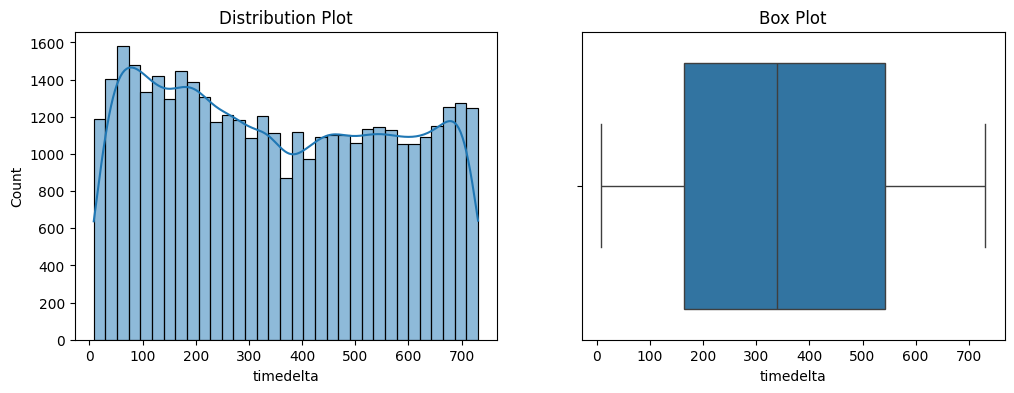

In [25]:
''' handle timedelta '''
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['timedelta'], kde=True, ax=axes[0])
axes[0].set_title('Distribution Plot')
sns.boxplot(data=df['timedelta'], ax=axes[1], orient='h')
axes[1].set_title('Box Plot')

# timedelta looks evenly distributed

In [26]:
correlation_td = df['timedelta'].corr(df['shares'])
print(f'correlation of timedelta with target variable : {correlation_td}')


# correlation is less, but doesnt mean it has to remove. can further lookinto it while variable selection

correlation of timedelta with target variable : 0.00866228771126254


In [27]:
import numpy as np

def count_outliers_iqr(df):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df.columns:
        if df[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 156
Feature: n_tokens_content | Outliers: 1933
Feature: n_unique_tokens | Outliers: 1604
Feature: n_non_stop_words | Outliers: 2827
Feature: n_non_stop_unique_tokens | Outliers: 1733
Feature: num_hrefs | Outliers: 2169
Feature: num_self_hrefs | Outliers: 2090
Feature: num_imgs | Outliers: 7703
Feature: num_videos | Outliers: 2946
Feature: average_token_length | Outliers: 1681
Feature: num_keywords | Outliers: 51
Feature: data_channel_is_lifestyle | Outliers: 2099
Feature: data_channel_is_entertainment | Outliers: 7057
Feature: data_channel_is_bus | Outliers: 6258
Feature: data_channel_is_socmed | Outliers: 2323
Feature: data_channel_is_tech | Outliers: 7346
Feature: data_channel_is_world | Outliers: 8427
Feature: kw_min_min | Outliers: 4677
Feature: kw_max_min | Outliers: 3661
Feature: kw_avg_min | Outliers: 2081
Feature: kw_min_max | Outliers: 5063
Feature: kw_max_max | Outliers: 9440
Feature: kw_avg_max | Outliers: 

In [28]:
# Function to detect and impute outliers with Q3 using the IQR method
def impute_outliers_with_Q3(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the Q3 of the column
       
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), Q3, df[col])

    return df

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df_imputed = impute_outliers_with_Q3(df, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with Q3:\n", df_imputed.head())



print("Shape of dataset before imputing outliers:",df.shape)
print("Shape of dataset after imputing outliers:",df_imputed.shape)

Data after imputing outliers with Q3:
                                                  url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0  

In [29]:
df1 = df_imputed

In [30]:
import numpy as np

def count_outliers_iqr(df1):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df1.columns:
        if df1[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df1[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df1[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df1)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 189
Feature: n_non_stop_words | Outliers: 1144
Feature: n_non_stop_unique_tokens | Outliers: 349
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 144
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_av

In [31]:

# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
        df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])

    return df1

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df1_capped = cap_outliers_iqr(df1, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df1_capped.head())

Data after capping outliers:
                                                  url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0           

In [32]:
df2 = df1_capped

In [33]:
import numpy as np

def count_outliers_iqr(df2):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df2.columns:
        if df2[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df2[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df2[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df2)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 0
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 0
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 0
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | Outli

<function matplotlib.pyplot.show(close=None, block=None)>

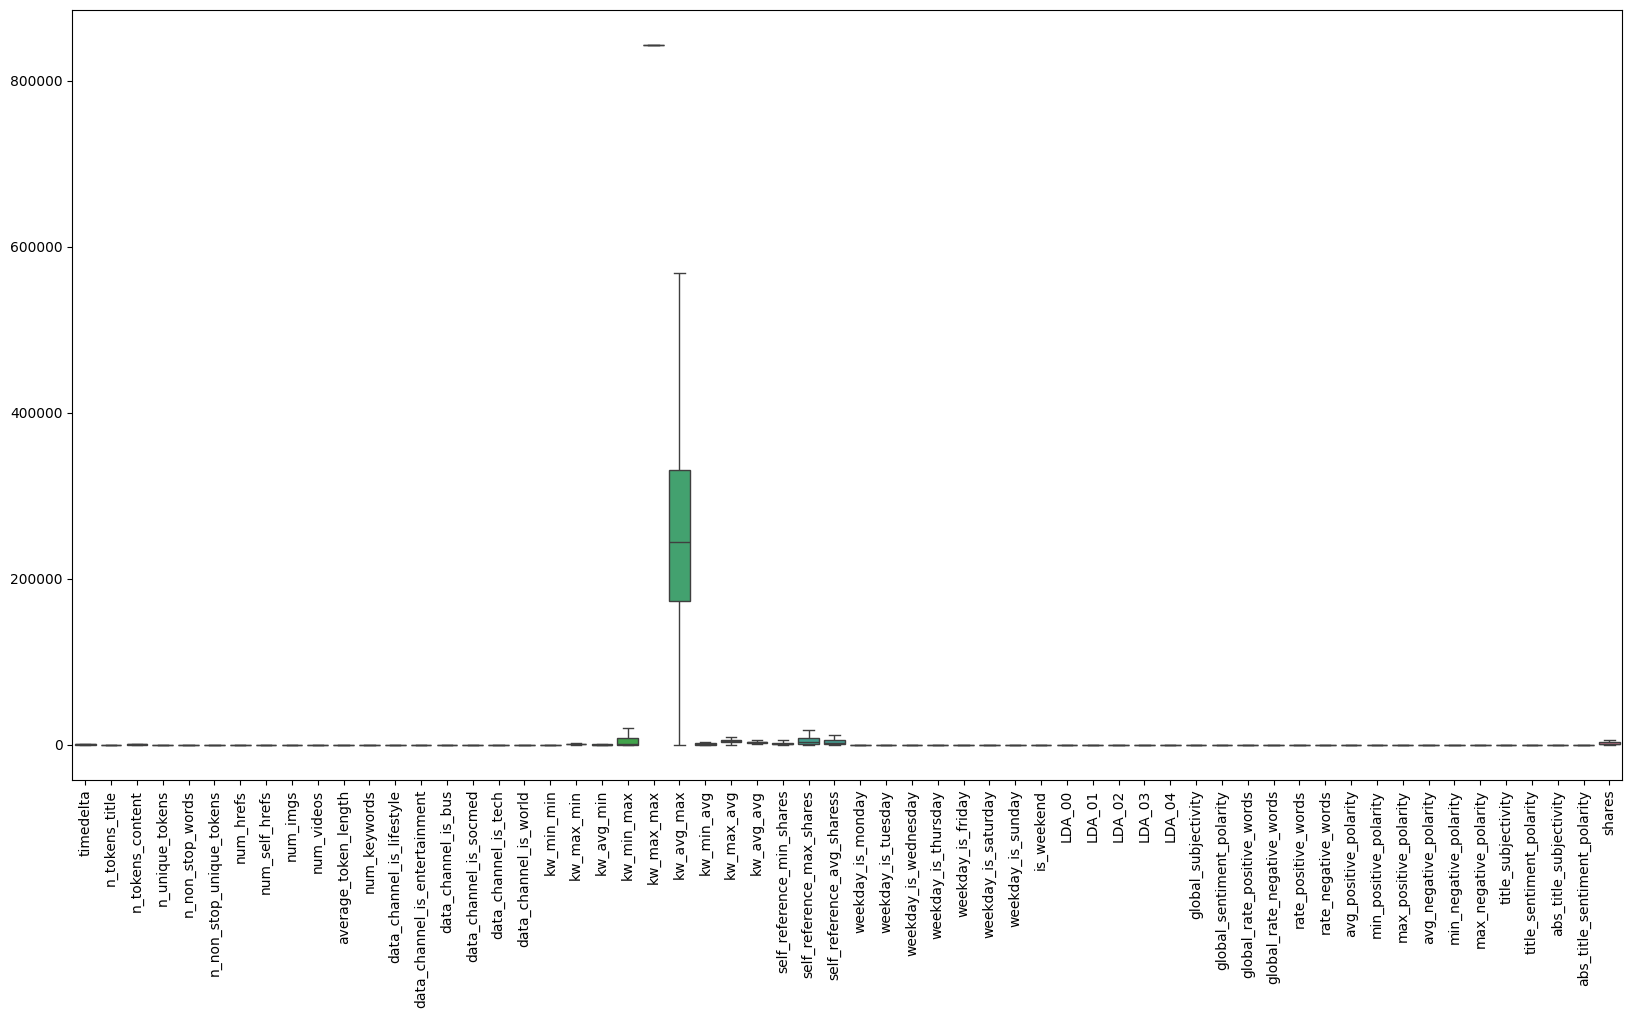

In [34]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = df2.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show

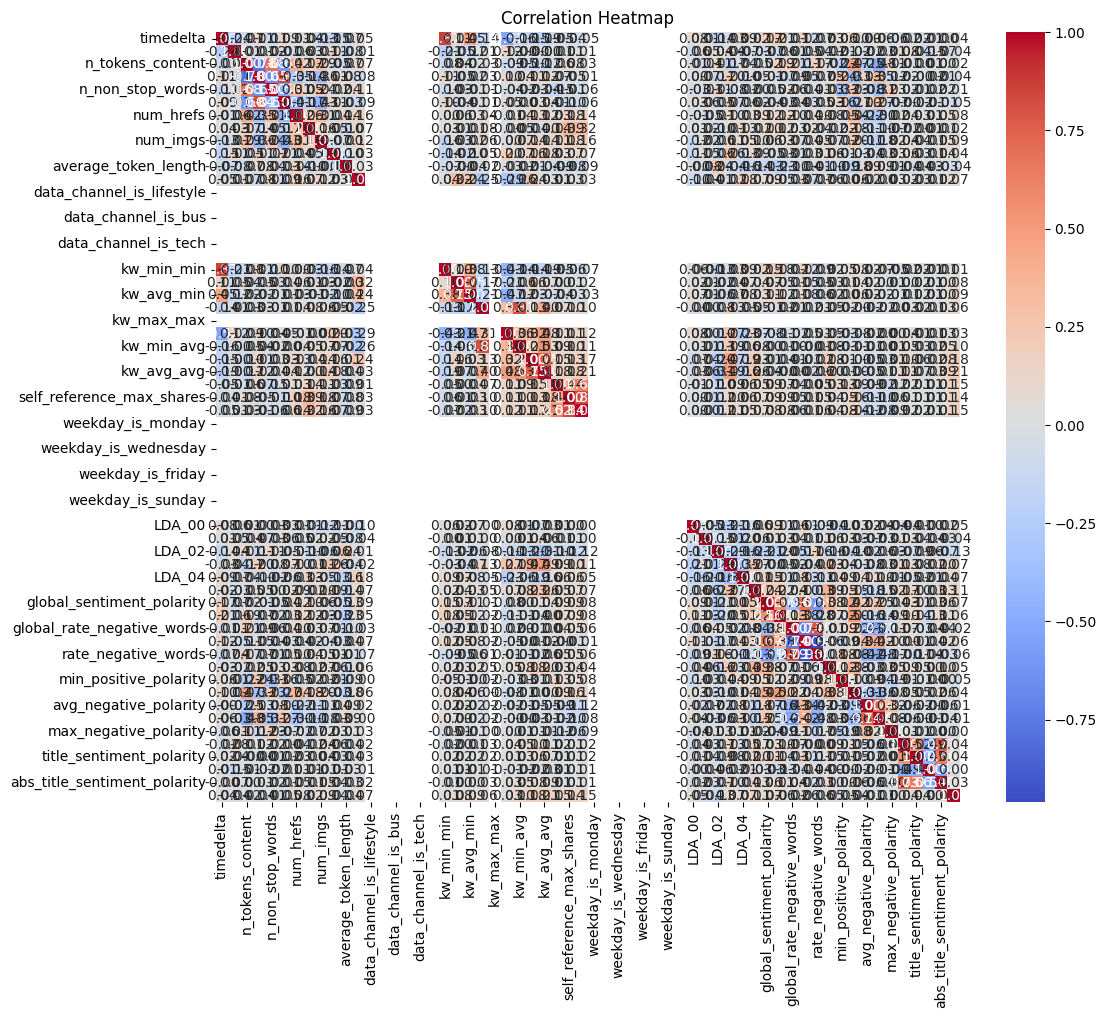

In [35]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = df2.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
import pandas as pd

# Calculate the correlation matrix
numeric_data = df2.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr().abs()
correlation_matrix

#plt.figure(figsize = (12,10))
# sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
#plt.show()

# Set the thresholds for high correlation
lower_threshold_positive = 0.97
upper_threshold_positive = 1.0
lower_threshold_negative = -1.0
upper_threshold_negative = -0.97

# Find pairs of features with correlation between 0.97 and 1, or -1 and -0.97
high_correlation = correlation_matrix[
    ((correlation_matrix >= lower_threshold_positive) & (correlation_matrix < upper_threshold_positive)) |
    ((correlation_matrix <= upper_threshold_negative) & (correlation_matrix > lower_threshold_negative))
]

# Print the feature names and their correlations in a descriptive format
for feature_1, feature_2, correlation in high_correlation.stack().reset_index().values:
    print(f"The correlation between {feature_1} and {feature_2} is {correlation:.2f}.")

In [37]:
# Check skewness of numerical columns
numerical_features = df2.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df2[numerical_features].skew())

timedelta                        0.120504
n_tokens_title                   0.096352
n_tokens_content                 0.775143
n_unique_tokens                  0.067503
n_non_stop_words                 0.000000
n_non_stop_unique_tokens        -0.041499
num_hrefs                        0.942002
num_self_hrefs                   0.546434
num_imgs                         1.185781
num_videos                       1.079535
average_token_length             0.031092
num_keywords                    -0.119867
data_channel_is_lifestyle        0.000000
data_channel_is_entertainment    0.000000
data_channel_is_bus              0.000000
data_channel_is_socmed           0.000000
data_channel_is_tech             0.000000
data_channel_is_world            0.000000
kw_min_min                       0.330201
kw_max_min                       0.442717
kw_avg_min                       0.459754
kw_min_max                       1.288719
kw_max_max                       0.000000
kw_avg_max                       0

In [38]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Inspect for problematic features
print(df2[numerical_features].describe())

# Drop constant or near-constant columns
constant_columns = [col for col in numerical_features if df2[col].nunique() <= 1]
if constant_columns:
    print(f"Dropping constant columns: {constant_columns}")
    numerical_features = [col for col in numerical_features if col not in constant_columns]

# Handle problematic values like zeros or negatives
for col in numerical_features:
    if (df2[col] <= 0).any():
        print(f"Adjusting negative or zero values in column: {col}")
        df2[col] += abs(df2[col].min()) + 1  # Shift to make all values positive

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
try:
    df2[numerical_features] = pt.fit_transform(df2[numerical_features])
    print(df2[numerical_features].skew())
except Exception as e:
    print(f"Error applying PowerTransformer: {e}")


          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.389239        484.590455         0.548119   
std      214.163767        2.071135        308.540247         0.095884   
min        8.000000        5.000000          0.000000         0.288367   
25%      164.000000        9.000000        246.000000         0.480564   
50%      339.000000       10.000000        409.000000         0.548014   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       16.000000       1421.000000         0.800893   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      3.964400e+04              39644.000000  39644.000000   
mean       1.000000e+00                  0.698756      9.191605   
std        2.584093e-09                  0.091368      6.417848   
min        1.000000e+00                  0.462628      0.000000  

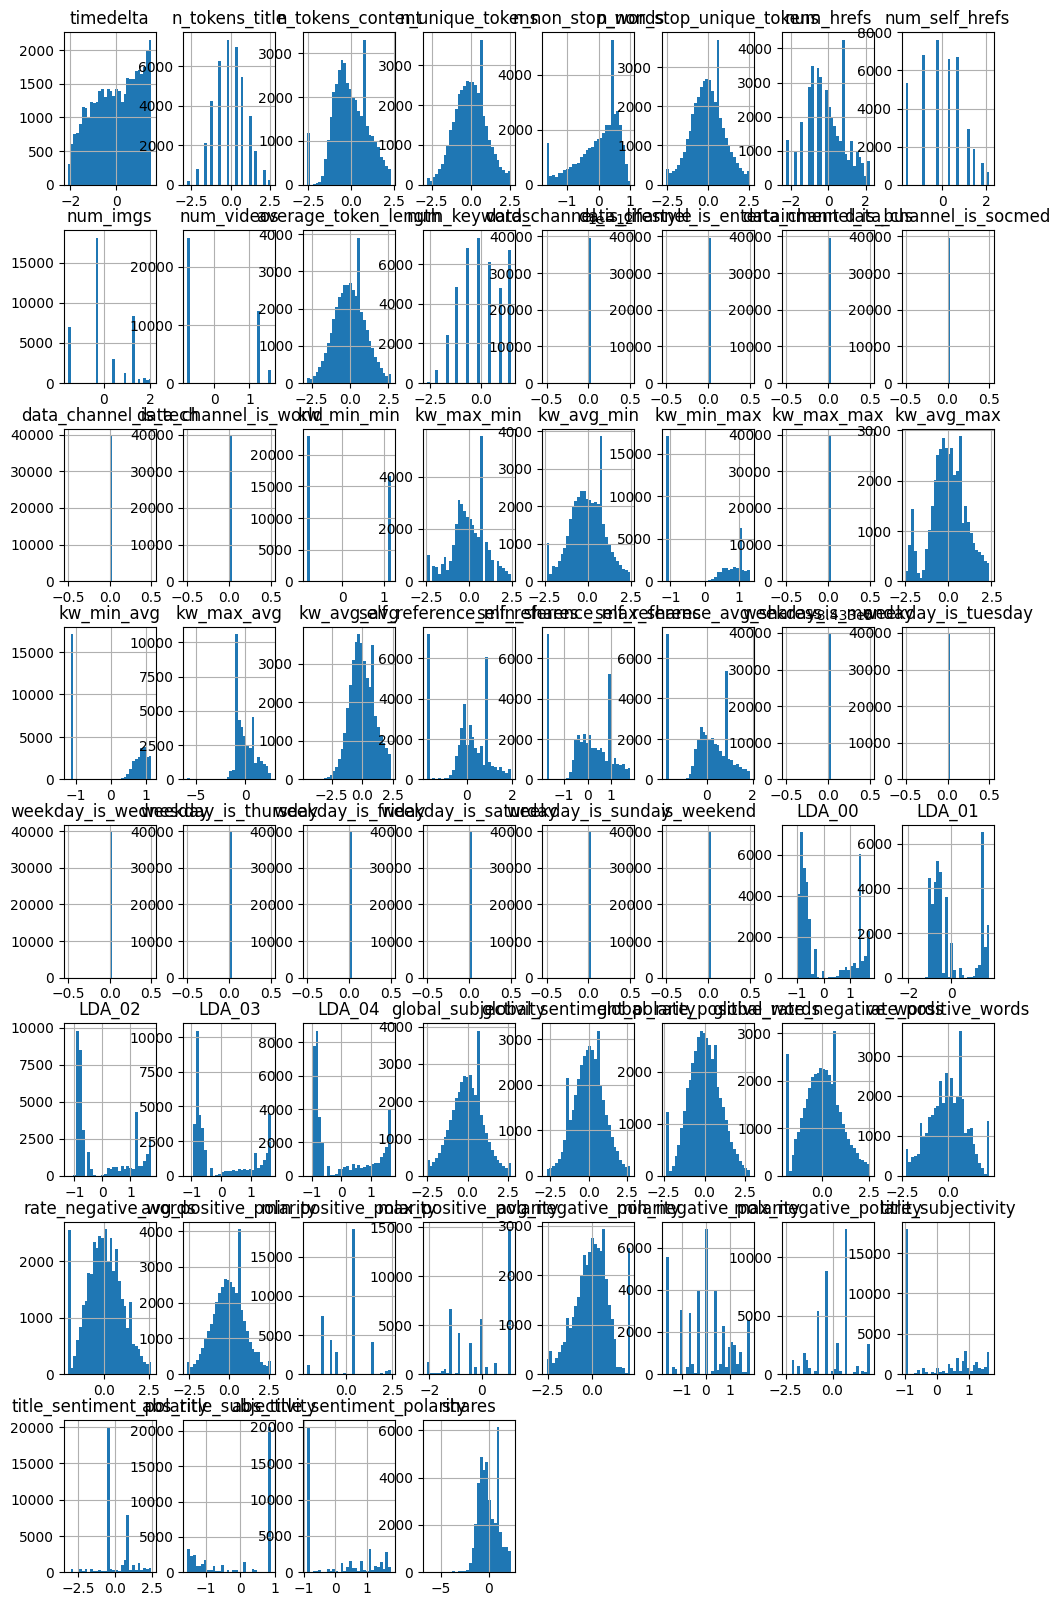

In [39]:
# Plot histograms after transformed features
df2.hist(figsize=(12, 20), bins=30)
plt.show()

In [40]:
import numpy as np

def count_outliers_iqr(df2):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df2.columns:
        if df2[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df2[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df2[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df2)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 118
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 184
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 76
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | 

In [41]:
# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df2, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df2[col] = np.where(df2[col] < lower_bound, lower_bound, df2[col])
        df2[col] = np.where(df2[col] > upper_bound, upper_bound, df2[col])

    return df2

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df2_capped = cap_outliers_iqr(df2, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df2_capped.head())

Data after capping outliers:
                                                  url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...   1.540036   
1  http://mashable.com/2013/01/07/ap-samsung-spon...   1.540036   
2  http://mashable.com/2013/01/07/apple-40-billio...   1.540036   
3  http://mashable.com/2013/01/07/astronaut-notre...   1.540036   
4   http://mashable.com/2013/01/07/att-u-verse-apps/   1.540036   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.784775         -0.814391         1.198777     -8.817114e-13   
1       -0.657794         -0.657887         0.598824     -6.327855e-13   
2       -0.657794         -0.850764         0.293476     -1.062136e-12   
3       -0.657794          0.302782        -0.452098      2.845363e-13   
4        1.248017          1.649427        -1.393877      7.060325e-13   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  1.281235  -0.784947       -0.2

In [42]:
import numpy as np

def count_outliers_iqr(df2_capped):
    outlier_count = 0  # Initialize counter for total outliers
    column_outlier_counts = {}  # Dictionary to store outlier counts per column

    for col in df2_capped.columns:
        if df2_capped[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df2_capped[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df2[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers for this column
            num_outliers = df2_capped[(df2_capped[col] < lower_bound) | (df2_capped[col] > upper_bound)].shape[0]
            outlier_count += num_outliers
            column_outlier_counts[col] = num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    print("\nTotal number of outliers across all columns:", outlier_count)
    return column_outlier_counts, outlier_count

# Usage
column_outlier_counts, total_outliers = count_outliers_iqr(df2_capped)

print("\nTotal number of outliers in the dataset:", total_outliers)

Feature: timedelta | Outliers: 0
Feature: n_tokens_title | Outliers: 0
Feature: n_tokens_content | Outliers: 0
Feature: n_unique_tokens | Outliers: 0
Feature: n_non_stop_words | Outliers: 0
Feature: n_non_stop_unique_tokens | Outliers: 0
Feature: num_hrefs | Outliers: 0
Feature: num_self_hrefs | Outliers: 0
Feature: num_imgs | Outliers: 0
Feature: num_videos | Outliers: 0
Feature: average_token_length | Outliers: 0
Feature: num_keywords | Outliers: 0
Feature: data_channel_is_lifestyle | Outliers: 0
Feature: data_channel_is_entertainment | Outliers: 0
Feature: data_channel_is_bus | Outliers: 0
Feature: data_channel_is_socmed | Outliers: 0
Feature: data_channel_is_tech | Outliers: 0
Feature: data_channel_is_world | Outliers: 0
Feature: kw_min_min | Outliers: 0
Feature: kw_max_min | Outliers: 0
Feature: kw_avg_min | Outliers: 0
Feature: kw_min_max | Outliers: 0
Feature: kw_max_max | Outliers: 0
Feature: kw_avg_max | Outliers: 0
Feature: kw_min_avg | Outliers: 0
Feature: kw_max_avg | Outli

In [43]:
df3 =df2_capped

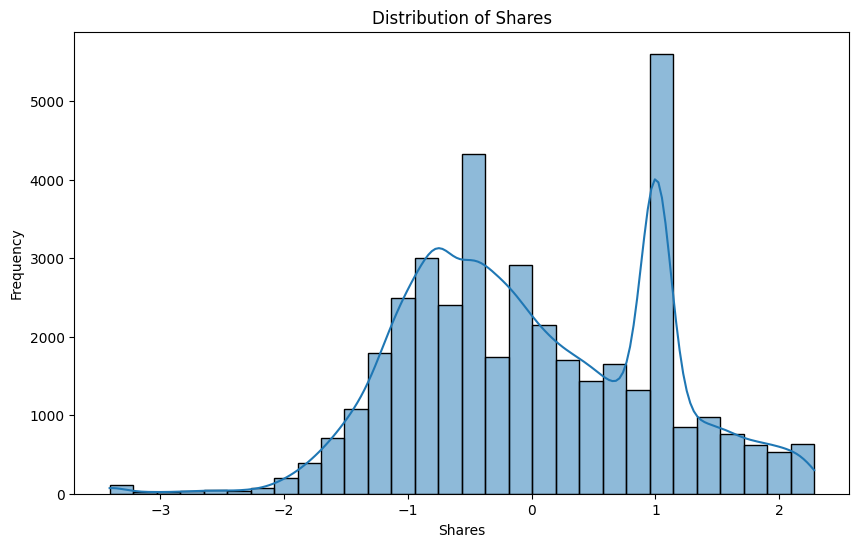

In [44]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df3['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

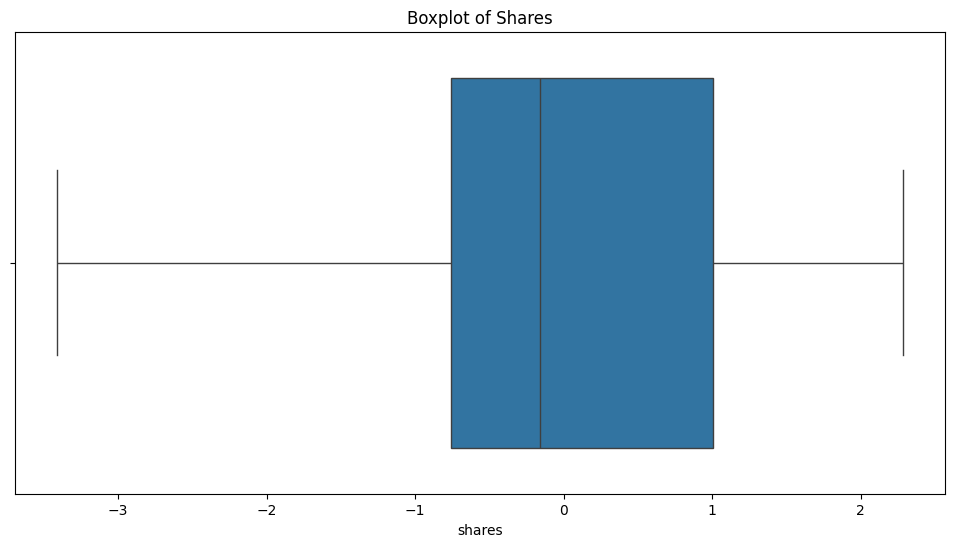

In [45]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='shares', data=df3)
plt.title('Boxplot of Shares')
plt.show()

In [46]:
df3= df3.drop(columns = 'url')

In [47]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Separate features and target
X = df3.drop(columns=['shares'])
y = df3['shares']

# Impute missing values with the mean (you could also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check if there are any remaining NaNs (should be none)
print(X_imputed.isna().sum().sum())  # Should print 0 if all NaNs are handled



0


In [48]:
print(y.isna().sum()) 

0


In [49]:
# Replace NaN in y with the median
y = y.fillna(y.median())

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Now proceed with SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_imputed, y)
X_kbest = selector.transform(X_imputed)

selected_features = X_imputed.columns[selector.get_support()]
X_kbest_df3 = pd.DataFrame(X_kbest, columns=selected_features)

# Fit a RandomForestRegressor to evaluate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_kbest_df3, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df3 = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df3)

                      Feature  Importance
3                  kw_avg_avg    0.161490
2                  kw_max_avg    0.117126
7                      LDA_02    0.114748
9   global_sentiment_polarity    0.112876
8         global_subjectivity    0.109943
1                  kw_avg_min    0.109188
0                  kw_max_min    0.088960
6  self_reference_avg_sharess    0.069008
4   self_reference_min_shares    0.066119
5   self_reference_max_shares    0.050542


### Split Data into Training and Testing Sets
Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models such as machine learning are accurate.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df3, y, test_size=0.2, random_state=42)

X_test_unseen = X_test.copy()
X_test_unseen.to_csv('X_test_unseen.csv', index=False)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31715, 10)
X_test shape: (7929, 10)
y_train shape: (31715,)
y_test shape: (7929,)


## 10. Feature Scailing
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build the ML Model
Here we are creating regression models.Regression is a statistical technique used to model and analyze the relationships between a dependent variable (often referred to as the target or output variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand how the dependent variable changes when any one of the independent variables is varied while the others are held fixed.

## 1.Linear Regression
Linear regression is a regression technique. It is used to model the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to the observed data.

In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

## 2.Support Vector Regressor (SVR)
A type of Support Vector Machine that uses the principles of maximizing the margin to create a decision boundary for regression tasks. It attempts to fit the best line within a predefined margin of tolerance.

In [55]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

## 3. Random Forest Regression
An ensemble learning method that constructs multiple decision trees during training and outputs the average prediction from all trees for regression tasks. It reduces overfitting compared to a single decision tree.

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

## 4.Gradient Boosting Regressor
An ensemble technique that builds models sequentially, each new model correcting the errors of the previous one. It uses decision trees as base learners.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

## 5.k-Nearest Neighbors Regressor (k-NN)
A non-parametric method that predicts the value of a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

## 6.Multi-layer Perceptron (MLP) Regressor
The MLP regressor is capable of modeling complex non-linear relationships. It's flexible and can approximate any continuous function given enough data and appropriate architecture.

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

## 12.Model Evaluation
Model evaluation is a crucial step in the machine learning workflow, particularly in regression tasks. It helps determine how well your model performs and its predictive accuracy. Here are the common metrics and techniques used for evaluating regression models:

1.Mean Absolute Error (MAE):The average of the absolute differences between predicted and actual values. 2.Mean Squared Error (MSE):The average of the squared differences between predicted and actual values. 3.Root Mean Squared Error (RMSE):The square root of the Mean Squared Error. 4.R-squared (R² Score):The proportion of variance in the dependent variable that can be predicted from the independent variables.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Linear Regression Model Evaluation¶

In [ ]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")

## 2.Support Vector Regression Model Evaluation

In [ ]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")

## 3. Random Forest Regression Model Evaluation

In [ ]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")

## 4.Gradient Boosting Regressor Model Evaluation

In [ ]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")

## 5.k-Nearest Neighbors Regressor Model Evaluation (k-NN)¶

In [ ]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")

## 6.Multi-layer Perceptron (MLP) Regressor Model Evaluation

In [ ]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")

## 13. Hyperparameter Tuning
Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
ridge = Ridge()
param_dist_ridge = {
    'alpha': np.logspace(-3, 3, 7)  
}
random_search_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist_ridge, 
                                         scoring='neg_mean_squared_error', cv=5, n_iter=10, verbose=1, random_state=42)
random_search_ridge.fit(X_train_scaled, y_train)
best_ridge = random_search_ridge.best_estimator_
print("Best Ridge Parameters:", random_search_ridge.best_params_)
y_pred_ridge = best_ridge.predict(X_test_scaled)

### 2.Multi-layer Perceptron (MLP)

In [ ]:
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001, early_stopping=True, n_iter_no_change=10)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': np.logspace(-5, 0, 3)  
}
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       scoring='neg_mean_squared_error', cv=3, n_iter=5, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train_scaled, y_train)

best_mlp = random_search_mlp.best_estimator_
print("Best MLP Parameters:", random_search_mlp.best_params_)
y_pred_mlp = best_mlp.predict(X_test_scaled)

In [ ]:
## Model Evaluation¶

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Root Mean Squared Error (RMSE): {rmse_mlp}")
print(f"R² Score: {r2_mlp}")